# Decision Tree Regression

## Initial Setup
## Important necessary modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#score metrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit

## Stylistics

In [36]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("precision", 2)

## Import Dataset

In [37]:
wine = pd.read_csv("/Users/rohithebbar/Desktop/Machine_learning_projects/Decision_trees/datasets/winequality-red.csv")

## Exploring the dataset


In [38]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [39]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
 wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


# Exploratory Data Analysis

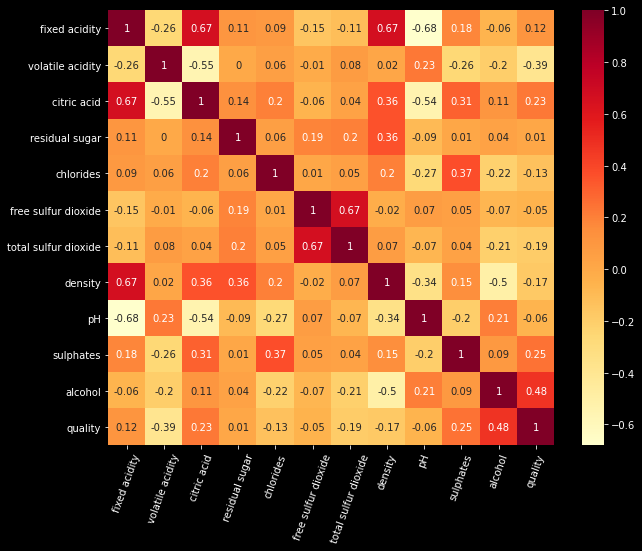

In [41]:
ax, figure = plt.subplots(figsize = (10, 8))
correlation_matrix = wine.corr().round(2)
#print(correlation_matrix)
heatmap = sns.heatmap(correlation_matrix,annot = True, cmap ="YlOrRd")
heatmap = plt.xticks(rotation = 70)

Based on produced plot, the alcohol and quality seems to have higher corelation than others

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

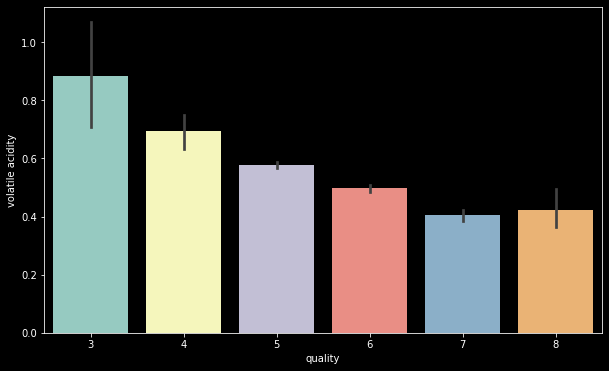

In [42]:
fig  = plt.figure(figsize =(10, 6))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

As we can see that volatile acidity goes down the quality goes up

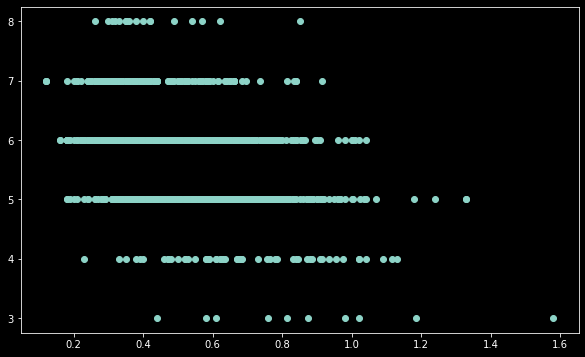

In [43]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x='volatile acidity', y = 'quality', data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

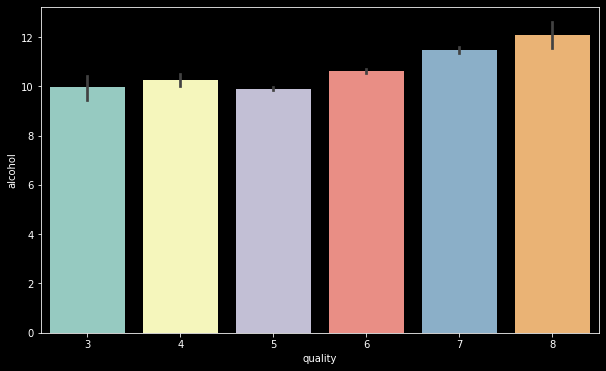

In [44]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Qualiy goes higher when the alcohol goes up


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

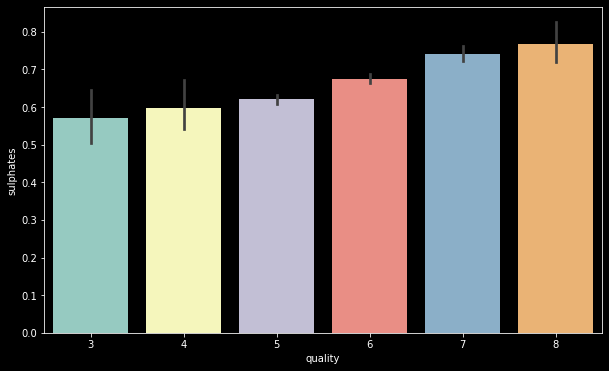

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Same goes with sulphates, when sulphates increases the quality goes up


## ML preprocessing

#### binning

In [46]:
bins = (3, 6, 8) # Values based on min median max of 'quality'
bin_labels = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins,labels = bin_labels)

In [47]:
wine['quality'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

## Encode the categorical values

In [48]:
enc = LabelEncoder()

In [49]:
wine['quality'] = enc.fit_transform(wine['quality'])

In [50]:
wine['quality'].value_counts()

0    1372
1     217
2      10
Name: quality, dtype: int64

/Users/rohithebbar/miniconda3/envs/mydlenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


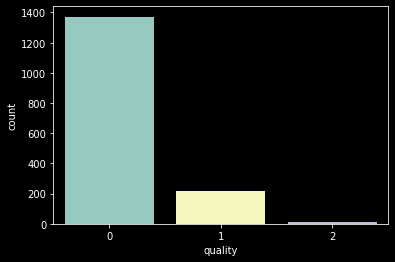

In [51]:
_ = sns.countplot(wine["quality"])

In [52]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [53]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [54]:
list = wine['quality']

In [55]:
print(list)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Spliting the dataset

In [56]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Model

In [59]:
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

tree_test_pred = tree.predict(X_test)

acc_train = tree.score(X_train, y_train)*100
acc_test = tree.score(X_test, y_test)*100


print("#----------------TRAIN DATA------------------#")
print(f'train score : {acc_train :.2f}')
print(f'test score : {acc_test :.2f}')

#----------------TRAIN DATA------------------#
train score : 88.51
test score : 86.25


In [60]:
print(confusion_matrix(y_test, tree_test_pred))

[[262  10   0]
 [ 33  14   0]
 [  1   0   0]]


In [61]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["bad", "good"], feature_names=wine.drop("quality", axis=1).columns, impurity=False, filled=True)

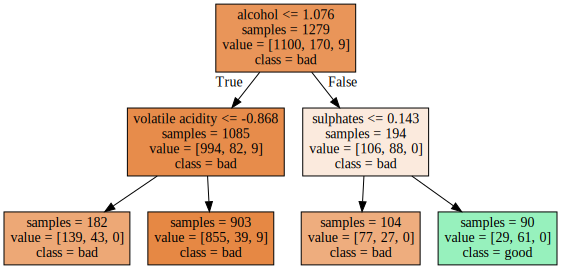

In [62]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [63]:
tree1 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
tree_test_pred = tree.predict(X_test)
acc_train = tree.score(X_train, y_train)*100
acc_test = tree.score(X_test, y_test)*100

print("#----------------TRAIN DATA------------------#")
print(f'train score : {acc_train :.2f}')
print(f'test score : {acc_test :.2f}')

#----------------TRAIN DATA------------------#
train score : 88.51
test score : 86.25


In [71]:
tree1 = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)
tree_test_pred = tree.predict(X_test)
acc_train = tree1.score(X_train, y_train)*100
acc_test = tree1.score(X_test, y_test)*100

print("#----------------TRAIN DATA------------------#")
print(f'train score : {acc_train :.2f}')
print(f'test score : {acc_test :.2f}')

#----------------TRAIN DATA------------------#
train score : 86.00
test score : 85.00


In [74]:
export_graphviz(tree1, out_file="tree1.dot", class_names=["bad", "good"], feature_names=wine.drop("quality", axis=1).columns, impurity=False, filled=True)

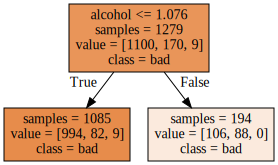

In [75]:
import graphviz
with open("tree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [79]:
tree2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
tree_test_pred = tree2.predict(X_test)
acc_train = tree2.score(X_train, y_train)*100
acc_test = tree2.score(X_test, y_test)*100

print("#----------------TRAIN DATA------------------#")
print(f'train score : {acc_train :.2f}')
print(f'test score : {acc_test :.2f}')

#----------------TRAIN DATA------------------#
train score : 89.44
test score : 85.62


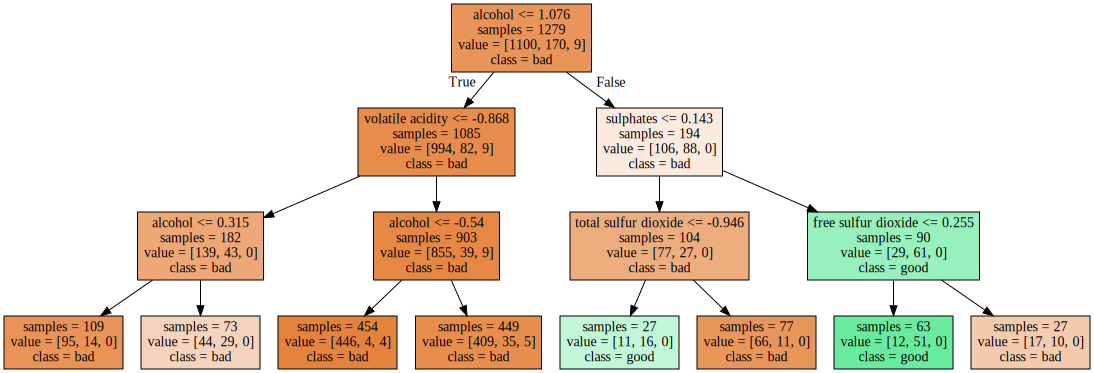

In [80]:
export_graphviz(tree2, out_file="tree2.dot", class_names=["bad", "good"], feature_names=wine.drop("quality", axis=1).columns, impurity=False, filled=True)

import graphviz
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [94]:
tree4 = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)
tree_test_pred = tree4.predict(X_test)
acc_train = tree4.score(X_train, y_train)*100
acc_test = tree4.score(X_test, y_test)*100

print("#----------------TRAIN DATA------------------#")
print(f'train score : {acc_train :.2f}')
print(f'test score : {acc_test :.2f}')

#----------------TRAIN DATA------------------#
train score : 100.00
test score : 87.50


## Random Forest Model

In [96]:
rfc = RandomForestClassifier(n_estimators = 7).fit(X_train, y_train)

acc_train = rfc.score(X_train, y_train)*100
acc_test = rfc.score(X_test, y_test)*100

print("# ------------METRICS---------------- #")
print("Train Score: {:.2f}".format(acc_train))
print("Test Score: {:.2f}".format(acc_test))


# ------------METRICS---------------- #
Train Score: 99.22
Test Score: 90.00
